In [1]:
from scattering_2D import get_reflexes, plot_result_gixd, export_results_csv
from ase import Atoms, Atom
from ase.io import read
import numpy as np
import itertools

In [2]:
reflections_exp = np.array([15.1, 16.7, 20.8, 25.2, 26.3, 28.1, 30.2])/10  # nm^-1 -> Angstrom^-1

If we assume that the first reflex is a [01] reflex or equivalent, we know that the lattice planes should be approximately 4.161 Å spaced:

In [3]:
d = 2*np.pi/reflections_exp[0]
print(d)

4.161049872304361


If we assume for now that the two lattice vectors have the same length and the lattice angle is between 90° and 120°, this means due to geometry the lengths of the lattice vectors should be between 4.161 and 4.805 Å.

Rough screening with symmetry constraint of |a|=|b|:

In [4]:
# unit-cell parameters to screen
alist = np.linspace(4, 5, 40)
#blist = np.linspace(4, 5, 10)
gamma = np.linspace(90, 120, 30)

# only one basis atom at 0,0,0
fractional_coords = [[0,0,0]]
n=0
best = []
for p in itertools.product(alist, gamma):
    a, g = p
    atoms_dummy = Atoms('C', scaled_positions=fractional_coords, cell=[a, a, 100, 90, 90, g])  # create dummy ase atoms object

    result = get_reflexes(atoms_dummy, dummy=False)
    
    # check if result is close to experimental reflexes
    matches = [np.min(np.abs(reflections_exp - Qxy)) for Qxy in result['Qxy_unique'] if np.min(np.abs(reflections_exp - Qxy)) < 0.02]
    # sum up the errors between the reflexes and the reflexions as further criterion for a good match
    summatches = [np.abs(r-result['Qxy_unique']) for r in reflections_exp]
    summatches = np.sum(np.array(summatches))

    best.append([a, a, g, summatches, len(matches)])
    

In [5]:
best = np.array(best)
bestmin = best[np.where(best[:,-1]==np.max(best[:,-1]))]  # checking which of the results has the highest number of matching reflexes
bestmin2 = bestmin[np.where(bestmin[:,-2]==np.min(bestmin[:,-2]))]  # of these, which have the lowest sum of errors
print(bestmin)
print(bestmin2)

[[  4.48717949   4.48717949 112.75862069 508.6003416    5.        ]
 [  4.51282051   4.51282051 112.75862069 503.96308376   5.        ]]
[[  4.51282051   4.51282051 112.75862069 503.96308376   5.        ]]


Finer screening based on results of coarser screening.

In [6]:
# unit-cell parameters to screen
alist = np.linspace(4.4, 4.6, 200)
#blist = np.linspace(4.4, 4.6, 20)
gamma = np.linspace(112, 113, 200)

# only one basis atom at 0,0,0
fractional_coords = [[0,0,0]]
n=0
best = []
for p in itertools.product(alist, gamma):
    a, g = p
    atoms_dummy = Atoms('C', scaled_positions=fractional_coords, cell=[a, a, 100, 90, 90, g])  # create dummy ase atoms object
    
    if n%10000==0:
        print(n)
    n += 1

    result = get_reflexes(atoms_dummy, dummy=False)
    
    # check if result is close to experimental reflexes
    matches = [np.min(np.abs(reflections_exp - Qxy)) for Qxy in result['Qxy_unique'] if np.min(np.abs(reflections_exp - Qxy)) < 0.01]
    # sum up the errors between the reflexes and the reflexions as further criterion for a good match
    summatches = [np.abs(r-result['Qxy_unique']) for r in reflections_exp]
    summatches = np.sum(np.array(summatches))

    best.append([a, a, g, summatches, len(matches)])

0
10000
20000
30000


In [7]:
best = np.array(best)
bestmin = best[np.where(best[:,-1]==np.max(best[:,-1]))]  # checking which of the results has the highest number of matching reflexes
bestmin2 = bestmin[np.where(bestmin[:,-2]==np.min(bestmin[:,-2]))]  # of these, which have the lowest sum of errors
print(bestmin)
print(bestmin2)

[[  4.49447236   4.49447236 112.63819095 506.6503825    5.        ]
 [  4.49447236   4.49447236 112.64321608 506.67615781   5.        ]
 [  4.49447236   4.49447236 112.64824121 506.70194028   5.        ]
 ...
 [  4.52060302   4.52060302 112.86432161 503.1288       5.        ]
 [  4.52060302   4.52060302 112.86934673 503.15423358   5.        ]
 [  4.52060302   4.52060302 112.87437186 503.17967415   5.        ]]
[[  4.52060302   4.52060302 112.75376884 502.57102451   5.        ]]


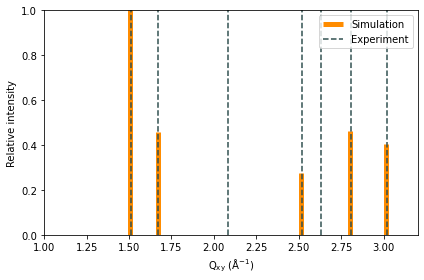

In [8]:
a = bestmin2[0][0]
b = bestmin2[0][1]
gamma = bestmin2[0][2]
fractional_coords = [[0,0,0]]
atoms_dummy = Atoms(['C'], scaled_positions=fractional_coords, cell=[a, b, 100, 90, 90, gamma])

result = get_reflexes(atoms_dummy, dummy=False)

fig, ax = plot_result_gixd(result, reflections_exp)
fig.tight_layout()
fig.savefig('SOS/single_site.png', dpi=300)

Best result for a=b=4.52 Å and γ=112.6° for unit cell with one basis particle. However, reflexes are missing compared to experimental result.

This cell is equivalent to a two atom basis with a rectangular unit cell with a=7.529 Å, b=5.007 Å, γ=90°:

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Q$_\\mathrm{xy}$ ($\\mathrm{\\AA}^{-1}$)', ylabel='Relative intensity'>)

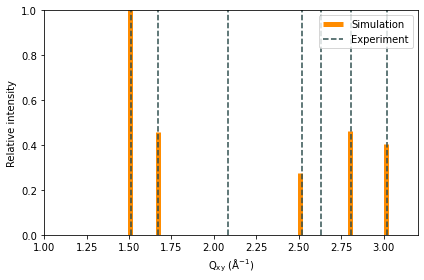

In [9]:
a = 7.529
b = 5.007
gamma = 90
fractional_coords = [[0,0,0 ], [0.5, 0.5, 0]]


atoms_dummy = Atoms(['C', 'C'], scaled_positions=fractional_coords, cell=[a, b, 100, 90, 90, gamma])

result = get_reflexes(atoms_dummy)

plot_result_gixd(result, reflections_exp)

The missing reflexes can be obtained by making the two sites distinguishable, for example by using two different basis atoms (for example C and S). This means the actual unit cell has two distinguishable sites.

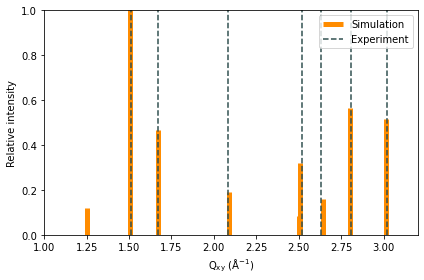

In [10]:
a = 7.529
b = 5.007
gamma = 90
fractional_coords = [[0,0,0 ], [0.5, 0.5, 0]]


atoms_dummy = Atoms(['C', 'S'], scaled_positions=fractional_coords, cell=[a, b, 100, 90, 90, gamma])

result = get_reflexes(atoms_dummy)

fig, ax = plot_result_gixd(result, reflections_exp)
fig.tight_layout()
fig.savefig('SOS/two_sites.png', dpi=300)

Distinguishable sites for the packing of SOS are the case for a herringbone-packing.

In [11]:
def get_herringbone(a, b, c, theta, sos):
    sos2 = sos.copy()
    sos2.rotate(theta, 'z', sos2.get_center_of_mass())
    sos2_pos = sos2.get_positions()
    sos2_pos[:,0] += a/2
    sos2_pos[:,1] += b/2
    names_merged = np.append(sos.get_chemical_symbols(), sos2.get_chemical_symbols())
    pos_merged = np.append(sos.get_positions(), sos2_pos, 0)
    merged = Atoms(names_merged, positions=pos_merged, cell=[a, b, c, 90, 90, 90], pbc=True)
    
    return merged

sos = read('SOS/HSOS.xyz')  # reading structure of HSOS

a = 7.529
b = 5.007

s = get_herringbone(a, b, 1000, 90, sos)  # generating HB packing of HSOS
s.write('SOS/HSOS_HB_from_GIXD.cif')


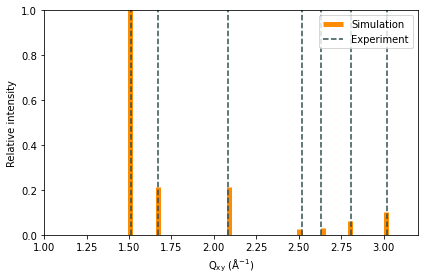

In [12]:
sos_hb = read('/home/dbodesheim/zih_home_drive/PhD/SMAIS/GIXD/HSOS_HB_from_GIXD.cif')
del sos_hb[[atom.index for atom in sos_hb if atom.symbol=='H']]  # deleting H-atoms
result = get_reflexes(sos_hb)

fig, ax = plot_result_gixd(result, reflections_exp)
fig.tight_layout()
fig.savefig('SOS/SOS_HB.png', dpi=300)

In [13]:
# exporting results
export_results_csv(result, filename='SOS/results_full.csv', full=True)
export_results_csv(result, filename='SOS/results.csv', full=False)